In [1]:
from Bio import Align
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
%matplotlib inline  

# Figure 5A

### Calculating similarity between selected Uniref50 clusters and representative sequences for the particular task

In [2]:
def align_overlap(input):
    i = input[0]
    j = input[1]

    count = 0
    diff = 0

    for orig, n in zip(i, j):
        if orig != n:
            diff += 1
        count += 1

    return 1 - diff/count


def extract_sequence_sequence_similarity(compare, to_compare):

    aligner = Align.PairwiseAligner()

    aligner.match_score = 1.0
    aligner.mismatch_score = -2.0
    aligner.gap_score = -2.5
    result = []
    for i in to_compare:
        alignment = aligner.align(compare, i)[0]
        overlap = align_overlap(alignment)
        result.append(overlap)
        
    return result
        
        

In [3]:
def extract_sequences(filename, wildtype=False):
    sequences = []
    seq = ''
    include = True
    for line in open(filename, 'r'):
        if '>' in line:
            if seq and include:
                sequences.append(seq)
                seq = ''
        else:
            seq += line.rstrip()
    sequences.append(seq)
    return sequences
            

### GFP Analysis

In [4]:
sequences = extract_sequences("UniRef50_GFP_clusters.fasta")
wildtype_sequence = extract_sequences("GFP_wildtype.fasta", wildtype=True)

In [5]:
wildtype_sequence

['MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTFSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK']

In [6]:
result_gfp = extract_sequence_sequence_similarity(wildtype_sequence[0], sequences)
print(len([i for i in result_gfp if i > 0.4]))

9


(array([ 8., 15., 14.,  3.,  1.,  0.,  1.,  1.,  0.,  3.]),
 array([0.12605042, 0.21344538, 0.30084034, 0.38823529, 0.47563025,
        0.56302521, 0.65042017, 0.73781513, 0.82521008, 0.91260504,
        1.        ]),
 <BarContainer object of 10 artists>)

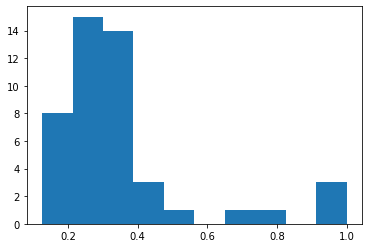

In [7]:
plt.hist(result_gfp)

### Covid Analysis

In [8]:
sequences = extract_sequences("UniRef50_Spike_clusters.fasta")
wildtype_sequence = extract_sequences("covid_wildtype.fasta", wildtype=True)

In [9]:
result_covid = extract_sequence_sequence_similarity(wildtype_sequence[0], sequences)
print(len([i for i in result_covid if i > 0.4]))

0


(array([ 2.,  6., 23., 14., 11., 12., 31., 35., 27., 10.]),
 array([0.06965174, 0.09084191, 0.11203207, 0.13322224, 0.1544124 ,
        0.17560257, 0.19679274, 0.2179829 , 0.23917307, 0.26036323,
        0.2815534 ]),
 <BarContainer object of 10 artists>)

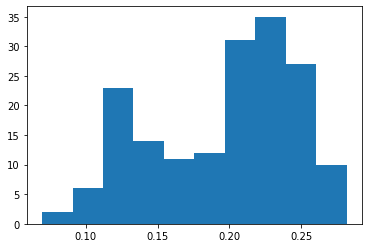

In [10]:
plt.hist(result_covid)

### RIF Analysis 

In [11]:
RIF_genes = ['rpoB', 'rpoC', 'Rv2752c', 'rpoA']
RIF_results = []
RIF_sub_means = []
RIF_num_clusters = []

for gene in RIF_genes:
    sequences = extract_sequences(f"UniRef50_{gene}_clusters.fasta")
    wildtype_sequence = extract_sequences(f"{gene}_wildtype.fasta", wildtype=True)
    sub_result = extract_sequence_sequence_similarity(wildtype_sequence[0], sequences)
    print(f"{gene}\t{np.mean(sub_result)}\t{len([i for i in sub_result if i > 0.4])}")
    RIF_results.extend(sub_result)
    RIF_num_clusters.append(len([i for i in sub_result if i > 0.4]))
    RIF_sub_means.append(np.mean(sub_result))

rpoB	0.20230029694488835	359
rpoC	0.19002445364403842	298
Rv2752c	0.2831110227407405	236
rpoA	0.29073564389883033	293


In [12]:
print(len([i for i in RIF_results if i >= 0.4]))

1198


(array([2.763e+03, 2.214e+03, 4.070e+03, 1.344e+03, 8.930e+02, 1.530e+02,
        2.100e+01, 3.000e+00, 3.000e+00, 4.000e+00]),
 array([0.01215805, 0.11076304, 0.20936802, 0.307973  , 0.40657799,
        0.50518297, 0.60378795, 0.70239294, 0.80099792, 0.8996029 ,
        0.99820789]),
 <BarContainer object of 10 artists>)

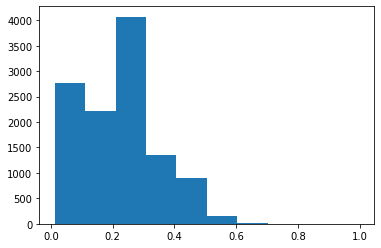

In [13]:
plt.hist(RIF_results)

### PZA Analysis

In [41]:
PZA_genes = ['pncA', 'clpC1', 'panD', 'Rv1258c', 'PPE35']
PZA_results = []
PZA_sub_means = []
PZA_num_clusters = []

for gene in PZA_genes:
    sequences = extract_sequences(f"UniRef50_{gene}_clusters.fasta")
    wildtype_sequence = extract_sequences(f"{gene}_wildtype.fasta", wildtype=True)
    sub_result = extract_sequence_sequence_similarity(wildtype_sequence[0], sequences)
    print(f"{gene}\t{np.mean(sub_result)}\t{len([i for i in sub_result if i > 0.4])}")
    PZA_num_clusters.append(len([i for i in sub_result if i > 0.4]))
    PZA_results.extend(sub_result)
    PZA_sub_means.append(np.mean(sub_result))
    

pncA	0.3305439690759223	60
clpC1	0.2049704419683218	2
panD	0.3416574347955694	230
Rv1258c	0.44368851585817143	1
PPE35	0.10222672064777327	0


In [45]:
print(len([i for i in PZA_results if i > 0.4]))

293
62


(array([ 16., 206., 308., 342., 160.,  24.,  15.,   2.,   1.,   3.]),
 array([0.03905591, 0.13515032, 0.23124473, 0.32733914, 0.42343355,
        0.51952796, 0.61562237, 0.71171677, 0.80781118, 0.90390559,
        1.        ]),
 <BarContainer object of 10 artists>)

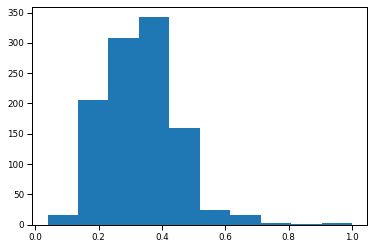

In [47]:
plt.hist(PZA_results)

### INH Analysis

In [48]:
INH_genes = ['mshA', 'Rv1258c', 'fabG1', 'inhA', 'furA', 'katG', 'ndh', 'ahpC', 'Rv2752c']
INH_results = []
sub_means = []
INH_num_clusters = []
for gene in INH_genes:
    sequences = extract_sequences(f"UniRef50_{gene}_clusters.fasta")
    wildtype_sequence = extract_sequences(f"{gene}_wildtype.fasta", wildtype=True)
    sub_result = extract_sequence_sequence_similarity(wildtype_sequence[0], sequences)
    print(f"{gene}\t{np.mean(sub_result)}\t{len([i for i in sub_result if i > 0.4])}")
    INH_num_clusters.append(len([i for i in sub_result if i > 0.4]))
    sub_means.append(np.mean(sub_result))
    INH_results.extend(sub_result)
    

mshA	0.28340182059300656	55
Rv1258c	0.44368851585817143	1
fabG1	0.3210477472652025	6
inhA	0.2858421862231409	0
furA	0.45877784718777914	11
katG	0.22132714546130913	90
ndh	1.0	1
ahpC	0.23279289036390707	20
Rv2752c	0.2831110227407405	236


In [49]:
print(len([i for i in INH_results if i > 0.4]))

0.258701110078928
0.07329711054938576
73
420


(array([3.140e+02, 2.140e+03, 6.663e+03, 1.276e+03, 2.470e+02, 3.700e+01,
        2.100e+01, 1.000e+00, 3.000e+00, 5.000e+00]),
 array([0.02162162, 0.11945946, 0.2172973 , 0.31513514, 0.41297297,
        0.51081081, 0.60864865, 0.70648649, 0.80432432, 0.90216216,
        1.        ]),
 <BarContainer object of 10 artists>)

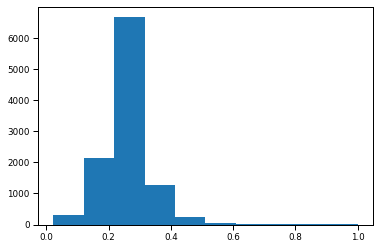

In [50]:
plt.hist(INH_results)

### Now plotting the number of similar clusters in Uniref50 versus ESM2 AUSPC

0.9999999999999999
1.4042654220543672e-24
1.0
0.0


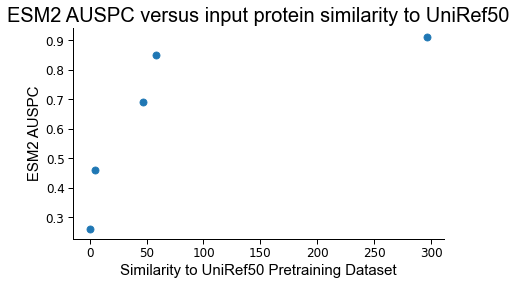

In [69]:
from scipy import stats
import seaborn as sns
average_cluster_num = [np.mean(PZA_num_clusters), np.mean(INH_num_clusters),np.mean(RIF_num_clusters), 
                       len(num_clusters_covid), len(num_clusters_gfp)]

ESM2_Frozen_AUSPC = [0.85, 0.69, 0.91, 0.26, 0.46]

plt.scatter(average_cluster_num, ESM2_Frozen_AUSPC, s = 50)

plt.title('ESM2 AUSPC versus input protein similarity to UniRef50', fontsize=20, family='Arial')
plt.ylabel('ESM2 AUSPC', fontsize=15, family='Arial')
plt.xlabel('Similarity to UniRef50 Pretraining Dataset', fontsize=15, family='Arial')
plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=8)

sns.set_context("paper")
sns.despine()
plt.savefig('Fig5A.pdf', bbox_inches = 'tight')

# Figure 5B

### Taking existing data from biological foundation models (protein language models) and seeing how they scale with similarity to Uniref50. Datasets are from ProteinGym. Preformance data is from Transception publication.

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from Bio import Align
from scipy import stats

In [3]:
df = pd.read_csv('results.csv')
x = ['AACC1_PSEAI_Dandage_2018', 'A4GRB6_PSEAI_Chen_2020', 'A4D664_9INFA_Soh_CCL141_2019', 'A4_HUMAN_Seuma_2021', 'A0A140D2T1_ZIKV_Sourisseau_growth_2019']
sub_df = df[df['Unnamed: 0'].isin(x)].copy()
x_dic = {'AACC1_PSEAI_Dandage_2018': 34, 
         'A4GRB6_PSEAI_Chen_2020': 37, 
         'A4D664_9INFA_Soh_CCL141_2019': 0, 
         'A4_HUMAN_Seuma_2021': 30, 
         'A0A140D2T1_ZIKV_Sourisseau_growth_2019': 13}
sub_df['number'] = sub_df['Unnamed: 0'].map(x_dic)

results = []
for i in sub_df.columns:
         if i not in(['Unnamed: 0', 'number','Neff_L_category','GEMME', 'EVmutation']):
            x = sub_df['number'].values
            y = sub_df[i].values
            
            """
            We filter to only consider those models that have a significant correlation with Uniref50 pretraining similarity
            Those without correlation either (1) have other spectral properties beyond sequence similarity to Uniref50 pretraining set
            or (2) were trained without the use of Uniref50
            
            """

            
            if stats.spearmanr(x, y).pvalue < 0.05:
                print(f'{i}\t{stats.spearmanr(x, y)}')
                for n, m in zip(x, y):
                    results.append({'Model':i, 'Similarity': n, 'Performance': m})
                

Tranception_L_retrieval	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
MSA_Transformer_single	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
MSA_Transformer_ensemble	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
ESM1v_single	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
ESM1v_ensemble	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
Progen2_medium	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
Progen2_base	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
Progen2_large	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
Progen2_ensemble	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
ESM1b	SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)


In [4]:
pd.DataFrame(results)

,Model,Similarity,Performance
0,Tranception_L_retrieval,13,0.351
1,Tranception_L_retrieval,30,0.452
2,Tranception_L_retrieval,0,0.393
3,Tranception_L_retrieval,37,0.652
4,Tranception_L_retrieval,34,0.466
5,MSA_Transformer_single,13,0.475
6,MSA_Transformer_single,30,0.393
7,MSA_Transformer_single,0,0.333
8,MSA_Transformer_single,37,0.695
9,MSA_Transformer_single,34,0.496


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

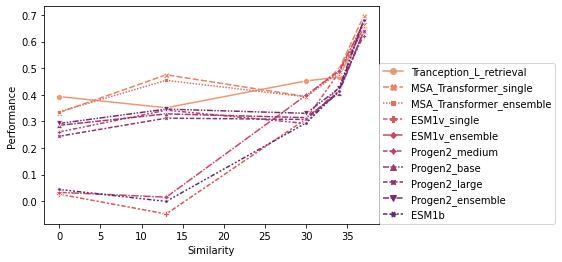

In [6]:
sns.lineplot(data = pd.DataFrame(results), x = 'Similarity', y = 'Performance',
            hue = 'Model', markers = True, style = 'Model', palette = 'flare')
plt.legend(loc = (1,0))

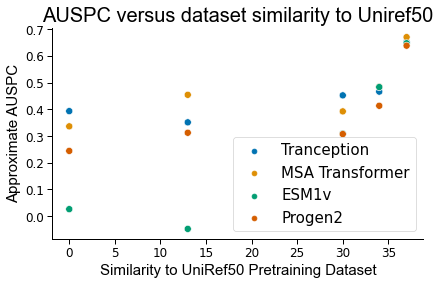

In [19]:
new_df = pd.DataFrame(results)
new_df = new_df[new_df['Model'].isin(['Tranception_L_retrieval', 'MSA_Transformer_ensemble', 'ESM1v_single', 'ESM1b', 'Progen2_large'])]
new_df['Model'] = new_df['Model'].map({
    'Tranception_L_retrieval': 'Tranception',
    'MSA_Transformer_ensemble': 'MSA Transformer',
    'ESM1v_single': 'ESM1v',
    'Progen2_large': 'Progen2'
})

ax = sns.scatterplot(data = new_df, x = 'Similarity', y = 'Performance',
            hue = 'Model', palette = 'colorblind', s = 50)
sns.set_context("paper")
plt.ylabel('Approximate AUSPC', fontsize=15, family='Arial')
plt.xlabel('Similarity to UniRef50 Pretraining Dataset', fontsize=15, family='Arial')
# plt.legend(loc = (1,0.7))
plt.title('AUSPC versus dataset similarity to Uniref50', fontsize=20, family='Arial')
plt.tight_layout()
sns.set_context("paper")
sns.despine()
plt.legend(prop={'size': 15})
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.savefig('Fig5B.pdf')

# Supplemental Code

### Code to get number of similar clusters for ProteinGym datasets for Figure 5B.

In [14]:
def align_overlap(input):
    i = input[0]
    j = input[1]

    count = 0
    diff = 0

    for orig, n in zip(i, j):
        if orig != n:
            diff += 1
        count += 1

    return 1 - diff/count

def calculate_similarity(aligner, seq1, seq2):
    return align_overlap(aligner.align(seq1, seq2)[0])
    

def extract_sequence_sequence_similarity(compare, to_compare):

    aligner = Align.PairwiseAligner()

    aligner.match_score = 1.0
    aligner.mismatch_score = -2.0
    aligner.gap_score = -2.5
    result = []
    for i in to_compare:
        alignment = aligner.align(compare, i)[0]
        overlap = align_overlap(alignment)            
        result.append(overlap)
        
    return result

def extract_sequences(filename, wildtype=False):
    sequences = []
    seq = ''
    include = True
    for line in open(filename, 'r'):
        if '>' in line:
            if seq and include:
                sequences.append(seq)
                seq = ''
        else:
            seq += line.rstrip()
    sequences.append(seq)
    return sequences

def extract_compare(filename, to_compare):
    aligner = Align.PairwiseAligner()

    aligner.match_score = 1.0
    aligner.mismatch_score = -2.0
    aligner.gap_score = -2.5
    
    
    results = []
    seq = ''
    include = True
    for line in tqdm(open(filename, 'r')):
        if '>' in line:
            if seq and include:
                results.append(calculate_similarity(aligner, seq, to_compare))
                print(np.mean(results))
                seq = ''
        else:
            seq += line.rstrip()
    results.append(calculate_similarity(aligner, seq, to_compare))
    return results
        

In [21]:
x = ['AACC1_PSEAI_Dandage_2018', 'A4GRB6_PSEAI_Chen_2020', 'A4D664_9INFA_Soh_CCL141_2019', 'A4_HUMAN_Seuma_2021', 'A0A140D2T1_ZIKV_Sourisseau_growth_2019']
dataset_to_ref_sequence = {'AACC1_PSEAI_Dandage_2018': 'MLRSSNDVTQQVSRPKTKLGGSSMGIIRTCRLGPDQVKSMRAALDLFGREFGDVATYSQHQPDSDYLGNLLRSKTFIALAAFDQEAVVGALAAYVLPKFEQPRSEIYIYDLAVSGEHRRQGIATALINLLKHEANALGAYVIYVQADYGDDPAVALYTKLGIREEVMHFDIDPSTAT',
                           'A4GRB6_PSEAI_Chen_2020': 'MFKLLSKLLVYLTASIMAIASPLAFSVDSSGEYPTVSEIPVGEVRLYQIADGVWSHIATQSFDGAVYPSNGLIVRDGDELLLIDTAWGAKNTAALLAEIEKQIGLPVTRAVSTHFHDDRVGGVDVLRAAGVATYASPSTRRLAEVEGNEIPTHSLEGLSSSGDAVRFGPVELFYPGAAHSTDNLIVYVPSASVLYGGCAIYELSRTSAGNVADADLAEWPTSIERIQQHYPEAQFVIPGHGLPGGLDLLKHTTNVVKAHTNRSVVE',
                            'A4D664_9INFA_Soh_CCL141_2019':'MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMGAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIVGLMVGGVVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQMQN',
                           'A4_HUMAN_Seuma_2021': 'MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMVAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGGVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQMQN',
                            'A0A140D2T1_ZIKV_Sourisseau_growth_2019': 'MKNPKKKSGGFRIVNMLKRGVARVNPLGGLKRLPAGLLLGHGPIRMVLAILAFLRFTAIKPSLGLINRWGSVGKKEAMEIIKKFKKDLAAMLRIINARKERKRRGADTSIGIIGLLLTTAMAAEITRRGSAYYMYLDRSDAGKAISFATTLGVNKCHVQIMDLGHMCDATMSYECPMLDEGVEPDDVDCWCNTTSTWVVYGTCHHKKGEARRSRRAVTLPSHSTRKLQTRSQTWLESREYTKHLIKVENWIFRNPGFALVAVAIAWLLGSSTSQKVIYLVMILLIAPAYSARCIGVSNRDFVEGMSGGTWVDVVLEHGGCVTVMAQDKPTVDIELVTTTVSNMAEVRSYCYEASISDMASDSRCPTQGEAYLDKQSDTQYVCKRTLVDRGWGNGCGLFGKGSLVTCAKFTCSKKMTGKSIQPENLEYRIMLSVHGSQHSGMIVNDTGYETDENRAKVEVTPNSPRAEATLGGFGSLGLDCEPRTGLDFSDLYYLTMNNKHWLVHKEWFHDIPLPWHAGADTGTPHWNNKEALVEFKDAHAKRQTVVVLGSQEGAVHTALAGALEAEMDGAKGKLFSGHLKCRLKMDKLRLKGVSYSLCTAAFTFTKVPAETLHGTVTVEVQYAGTDGPCKIPVQMAVDMQTLTPVGRLITANPVITESTENSKMMLELDPPFGDSYIVIGVGDKKITHHWHRSGSTIGKAFEATVRGAKRMAVLGDTAWDFGSVGGVFNSLGKGIHQIFGAAFKSLFGGMSWFSQILIGTLLVWLGLNTKNGSISLTCLALGGVMIFLSTAVSADVGCSVDFSKKETRCGTGVFIYNDVEAWRDRYKYHPDSPRRLAAAVKQAWEEGICGISSVSRMENIMWKSVEGELNAILEENGVQLTVVVGSVKNPMWRGPQRLPVPVNELPHGWKAWGKSYFVRAAKTNNSFVVDGDTLKECPLEHRAWNSFLVEDHGFGVFHTSVWLKVREDYSLECDPAVIGTAVKGREAAHSDLGYWIESEKNDTWRLKRAHLIEMKTCEWPKSHTLWTDGVEESDLIIPKSLAGPLSHHNTREGYRTQVKGPWHSEELEIRFEECPGTKVYVEETCGTRGPSLRSTTASGRVIEEWCCRECTMPPLSFRAKDGCWYGMEIRPRKEPESNLVRSMVTAGSTDHMDHFSLGVLVILLMVQEGLKKRMTTKIIMSTSMAVLVVMILGGFSMSDLAKLVILMGATFAEMNTGGDVAHLALVAAFKVRPALLVSFIFRANWTPRESMLLALASCLLQTAISALEGDLMVLINGFALAWLAIRAMAVPRTDNIALPILAALTPLARGTLLVAWRAGLATCGGIMLLSLKGKGSVKKNLPFVMALGLTAVRVVDPINVVGLLLLTRSGKRSWPPSEVLTAVGLICALAGGFAKADIEMAGPMAAVGLLIVSYVVSGKSVDMYIERAGDITWEKDAEVTGNSPRLDVALDESGDFSLVEEDGPPMREIILKVVLMAICGMNPIAIPFAAGAWYVYVKTGKRSGALWDVPAPKEVKKGETTDGVYRVMTRRLLGSTQVGVGVMQEGVFHTMWHVTKGAALRSGEGRLDPYWGDVKQDLVSYCGPWKLDAAWDGLSEVQLLAVPPGERARNIQTLPGIFKTKDGDIGAVALDYPAGTSGSPILDKCGRVIGLYGNGVVIKNGSYVSAITQGKREEETPVECFEPSMLKKKQLTVLDLHPGAGKTRRVLPEIVREAIKKRLRTVILAPTRVVAAEMEEALRGLPVRYMTTAVNVTHSGTEIVDLMCHATFTSRLLQPIRVPNYNLYIMDEAHFTDPSSIAARGYISTRVEMGEAAAIFMTATPPGTRDAFPDSNSPIMDTEVEVPERAWSSGFDWVTDHSGKTVWFVPSVRNGNEIAACLTKAGKRVIQLSRKTFETEFQKTKNQEWDFVITTDISEMGANFKADRVIDSRRCLKPVILDGERVILAGPMPVTHASAAQRRGRIGRNPNKPGDEYMYGGGCAETDEGHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFKLRTEQRKTFVELMKRGDLPVWLAYQVASAGITYTDRRWCFDGTTNNTIMEDSVPAEVWTKYGEKRVLKPRWMDARVCSDHAALKSFKEFAAGKRGAALGVMEALGTLPGHMTERFQEAIDNLAVLMRAETGSRPYKAAAAQLPETLETIMLLGLLGTVSLGIFFVLMRNKGIGKMGFGMVTLGASAWLMWLSEIEPARIACVLIVVFLLLVVLIPEPEKQRSPQDNQMAIIIMVAVGLLGLITANELGWLERTKNDIAHLMGRREEGATMGFSMDIDLRPASAWAIYAALTTLITPAVQHAVTTSYNNYSLMAMATQAGVLFGMGKGMPFYAWDLGVPLLMMGCYSQLTPLTLIVAIILLVAHYMYLIPGLQAAAARAAQKRTAAGIMKNPVVDGIVVTDIDTMTIDPQVEKKMGQVLLIAVAISSAVLLRTAWGWGEAGALITAATSTLWEGSPNKYWNSSTATSLCNIFRGSYLAGASLIYTVTRNAGLVKRRGGGTGETLGEKWKARLNQMSALEFYSYKKSGITEVCREEARRALKDGVATGGHAVSRGSAKLRWLVERGYLQPYGKVVDLGCGRGGWSYYAATIRKVQEVRGYTKGGPGHEEPMLVQSYGWNIVRLKSGVDVFHMAAEPCDTLLCDIGESSSSPEVEETRTLRVLSMVGDWLEKRPGAFCIKVLCPYTSTMMETMERLQRRHGGGLVRVPLSRNSTHEMYWVSGAKSNIIKSVSTTSQLLLGRMDGPRRPVKYEEDVNLGSGTRAVASCAEAPNMKIIGRRIERIRNEHAETWFLDENHPYRTWAYHGSYEAPTQGSASSLVNGVVRLLSKPWDVVTGVTGIAMTDTTPYGQQRVFKEKVDTRVPDPQEGTRQVMNIVSSWLWKELGKRKRPRVCTKEEFINKVRSNAALGAIFEEEKEWKTAVEAVNDPRFWALVDREREHHLRGECHSCVYNMMGKREKKQGEFGKAKGSRAIWYMWLGARFLEFEALGFLNEDHWMGRENSGGGVEGLGLQRLGYILEEMNRAPGGKMYADDTAGWDTRISKFDLENEALITNQMEEGHRTLALAVIKYTYQNKVVKVLRPAEGGKTVMDIISRQDQRGSGQVVTYALNTFTNLVVQLIRNMEAEEVLEMQDLWLLRKPEKVTRWLQSNGWDRLKRMAVSGDDCVVKPIDDRFAHALRFLNDMGKVRKDTQEWKPSTGWSNWEEVPFCSHHFNKLYLKDGRSIVVPCRHQDELIGRARVSPGAGWSIRETACLAKSYAQMWQLLYFHRRDLRLMANAICSAVPVDWVPTGRTTWSIHGKGEWMTTEDMLMVWNRVWIEENDHMEDKTPVTKWTDIPYLGKREDLWCGSLIGHRPRTTWAENIKDTVNMVRRIIGDEEKYMDYLSTQVRYLGEEGSTPGVL',
                          }

for i in x:
    file_one = f'ProteinGym_Substitutions/{i}.csv'
    file_two = f'{i}_Uniref50.fasta' 
    ref_sequence = dataset_to_ref_sequence[i]
    sequences = [i for i in list(set(extract_sequences(file_two))) if 'X' not in i]
    print(f'{i}\t{len(sequences)}')
    result = extract_sequence_sequence_similarity(ref_sequence, sequences)
    print(np.mean(result))
    num_clusters = sum([i >= 0.40 for i in result])
    print(num_clusters)
    
    
    
    

AACC1_PSEAI_Dandage_2018	305055
0.23459844476523203
34
A4GRB6_PSEAI_Chen_2020	76291
0.2408015321216434
37
A4D664_9INFA_Soh_CCL141_2019	68
0.17236690732693405
0
A4_HUMAN_Seuma_2021	754
0.2193013698269827
30
A0A140D2T1_ZIKV_Sourisseau_growth_2019	2752
0.1209727360453352
13


# Supplemental Code

### UniRef Random Sequences Comparison Analysis: code to determine what threshold to use for sequence comparison for Uniref50 sequences
#### To run this last part you have to run the below command to get all the sequences to then compare. It's around 13 GB



In [ ]:
!wget https://ftp.uniprot.org/pub/databases/uniprot/uniref/uniref50/uniref50.fasta.gz

In [11]:
filename = "/Users/yashaektefaie/Downloads/UniRef50_Sequences"
sequences = []
seq = ''
include = True
for line in tqdm(open(filename, 'r')):
    if '>' in line:
        if seq and include:
            sequences.append(seq)
            seq = ''
    else:
        seq += line.rstrip()
    
    if len(sequences) > 1000000:
        break

FileNotFoundError: [Errno 2] No such file or directory: '/Users/yashaektefaie/Downloads/UniRef50_Sequences'

In [2]:
aligner = Align.PairwiseAligner()

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5

random_similarities = []
for i in tqdm(range(100000)):
    seq1, seq2 = random.sample(sequences, 2)
    if seq1 != seq2:
        random_similarities.append(calculate_similarity(aligner, seq1, seq2))

NameError: name 'Align' is not defined

In [51]:
np.mean(random_similarities)

0.210289692224332

(array([1.0404e+04, 4.7794e+04, 3.5181e+04, 2.9520e+03, 2.4480e+03,
        8.6800e+02, 2.1500e+02, 6.1000e+01, 5.4000e+01, 2.3000e+01]),
 array([0.02873987, 0.12439726, 0.22005464, 0.31571203, 0.41136942,
        0.50702681, 0.6026842 , 0.69834159, 0.79399897, 0.88965636,
        0.98531375]),
 <BarContainer object of 10 artists>)

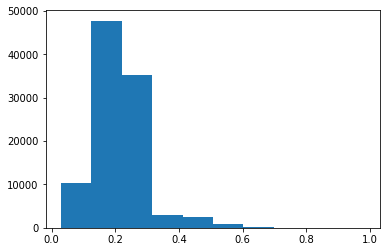

In [52]:
plt.hist(random_similarities)

In [53]:
np.mean(random_similarities) + 2*np.std(random_similarities)

0.3718881577166474